In [1]:
import numpy as np

from sklearn.decomposition import PCA

# MNIST

In [2]:
from mnist import MNIST

In [3]:
mnist_loader = MNIST("../data/mnist/")
mnist_loader.gz = True

### Load MNIST

In [4]:
X, y = mnist_loader.load_training()
_X, _y = mnist_loader.load_testing()

In [5]:
X = np.array(X, dtype='float32') / 255
y = np.array(y, dtype='int16')
_X = np.array(_X, dtype='float32') / 255
_y = np.array(_y, dtype='int16')

### Transform

In [28]:
mnist_pca_20 = PCA(n_components=20, random_state=666)
mnist_pca_5 = PCA(n_components=5, random_state=666)

In [29]:
%%time
mnist_pca_20.fit(X)

CPU times: user 2.48 s, sys: 219 ms, total: 2.69 s
Wall time: 1.5 s


PCA(copy=True, iterated_power='auto', n_components=20, random_state=666,
  svd_solver='auto', tol=0.0, whiten=False)

In [30]:
%%time
mnist_pca_5.fit(X)

CPU times: user 1.98 s, sys: 214 ms, total: 2.19 s
Wall time: 1.25 s


PCA(copy=True, iterated_power='auto', n_components=5, random_state=666,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
mnist_pca_20.components_

array([[ 6.9702035e-09,  8.3954772e-09, -2.1823453e-10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-2.4122533e-08, -2.2426992e-08,  3.1748457e-09, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 3.3037963e-09,  1.5345503e-08,  6.3899614e-09, ...,
        -0.0000000e+00, -0.0000000e+00, -0.0000000e+00],
       ...,
       [ 1.9280042e-08,  1.0291119e-08, -9.6131914e-10, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 6.2718399e-08,  1.2221625e-08,  3.1436677e-08, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 2.4748713e-08, -1.7609599e-08,  8.1631759e-09, ...,
        -0.0000000e+00, -0.0000000e+00, -0.0000000e+00]], dtype=float32)

In [32]:
mnist_pca_20.explained_variance_ratio_

array([0.09704716, 0.07095958, 0.06169116, 0.05389445, 0.04868825,
       0.04312254, 0.03271944, 0.02883912, 0.02762044, 0.02357013,
       0.021092  , 0.02023   , 0.01715828, 0.01692122, 0.01578634,
       0.01482938, 0.01324532, 0.01276863, 0.01186491, 0.01152439],
      dtype=float32)

In [33]:
mnist_pca_5.explained_variance_ratio_

array([0.09704709, 0.07095964, 0.06169123, 0.05389447, 0.04868815],
      dtype=float32)

In [34]:
X_transformed = mnist_pca_20.transform(X)
_X_transformed = mnist_pca_20.transform(_X)

X_transformed_5 = mnist_pca_5.transform(X)
_X_transformed_5 = mnist_pca_5.transform(_X)

### Predict LR

In [6]:
from sklearn.linear_model import LogisticRegression

In [36]:
mnist_lr = LogisticRegression(penalty='l2')

In [37]:
%%time
# 20 features
mnist_lr.fit(X_transformed, y)

CPU times: user 8.36 s, sys: 14.4 ms, total: 8.38 s
Wall time: 8.48 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
yhat = mnist_lr.predict(X_transformed)
print('20 - Train acc:', sum(yhat == y)/len(y))
_yhat = mnist_lr.predict(_X_transformed)
print('20 - Test acc:', sum(_yhat == _y)/len(_y))

20 - Train acc: 0.8603833333333334
20 - Test acc: 0.8679


In [39]:
%%time
# 5 features
mnist_lr.fit(X_transformed_5, y)

CPU times: user 2.29 s, sys: 1.97 ms, total: 2.3 s
Wall time: 2.31 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
yhat = mnist_lr.predict(X_transformed_5)
print('5 - Train acc:', sum(yhat == y)/len(y))
_yhat = mnist_lr.predict(_X_transformed_5)
print('5 - Test acc:', sum(_yhat == _y)/len(_y))

5 - Train acc: 0.6434666666666666
5 - Test acc: 0.6526


### Predict DT

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
mnist_tree = DecisionTreeClassifier(random_state=666)

In [44]:
%%time
# 20 features
mnist_tree.fit(X_transformed, y)

CPU times: user 3.87 s, sys: 12 ms, total: 3.88 s
Wall time: 3.95 s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=666,
            splitter='best')

In [46]:
yhat = mnist_tree.predict(X_transformed)
print('20 - Train acc:', sum(yhat == y)/len(y))
_yhat = mnist_tree.predict(_X_transformed)
print('20 - Test acc:', sum(_yhat == _y)/len(_y))

20 - Train acc: 1.0
20 - Test acc: 0.8435


In [47]:
%%time
# 5 features
mnist_tree.fit(X_transformed_5, y)

CPU times: user 717 ms, sys: 1.01 ms, total: 718 ms
Wall time: 720 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=666,
            splitter='best')

In [48]:
yhat = mnist_tree.predict(X_transformed_5)
print('5 - Train acc:', sum(yhat == y)/len(y))
_yhat = mnist_tree.predict(_X_transformed_5)
print('5 - Test acc:', sum(_yhat == _y)/len(_y))

5 - Train acc: 1.0
5 - Test acc: 0.6727


# SpamBase

In [2]:
spam_data = np.loadtxt('../data/spam/spambase.data', delimiter=',')

In [3]:
y_all = spam_data[:, -1]
spam_data = spam_data[:, :-1]

In [4]:
# train - 3.5k test - 1.1k
X, y = spam_data[:3500], y_all[:3500]
_X, _y = spam_data[3500:], y_all[3500:]

### Transform and predict

In [7]:
from sklearn.linear_model import LogisticRegression

In [28]:
%%time
goal = 0.835
eps = 0.02
test_acc = []
spam_lr = LogisticRegression(penalty='l2')
for i in range(1, X.shape[1] + 1):
    spam_pca = PCA(n_components=i)
    X_transformed = spam_pca.fit_transform(X)
    _X_transformed = spam_pca.transform(_X)
    spam_lr.fit(X_transformed, y)
    _yhat = spam_lr.predict(_X_transformed)
    test_acc.append(sum(_yhat == _y)/len(_y))

CPU times: user 16 s, sys: 627 ms, total: 16.6 s
Wall time: 8.68 s


In [30]:
np.argsort(test_acc)[::-1]

array([ 0, 43, 40,  1, 37, 42, 36, 41, 34, 35, 44,  2, 39, 33, 38, 32, 31,
       49, 53, 47, 46, 48, 52, 56, 45, 54, 50, 55, 30, 29, 51, 19, 28, 22,
       24, 26, 20, 27, 23, 18, 21, 25, 17, 16, 15, 14, 13, 12,  3,  6,  5,
        4, 11,  9,  7, 10,  8])

## n_c = 1

In [31]:
spam_pca = PCA(n_components=1)
X_transformed = spam_pca.fit_transform(X)
_X_transformed = spam_pca.transform(_X)

In [32]:
spam_lr = LogisticRegression(penalty='l2')

In [33]:
%time
spam_lr.fit(X_transformed, y)

CPU times: user 9 µs, sys: 1 µs, total: 10 µs
Wall time: 16.9 µs


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
yhat = spam_lr.predict(X_transformed)
print('Train acc:', sum(yhat == y)/len(y))
_yhat = spam_lr.predict(_X_transformed)
print('Test acc:', sum(_yhat == _y)/len(_y))

Train acc: 0.6325714285714286
Test acc: 0.8673932788374206


### n_c = 43

In [35]:
spam_pca = PCA(n_components=43)
X_transformed = spam_pca.fit_transform(X)
_X_transformed = spam_pca.transform(_X)

In [36]:
%time
spam_lr.fit(X_transformed, y)

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 8.11 µs


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
yhat = spam_lr.predict(X_transformed)
print('Train acc:', sum(yhat == y)/len(y))
_yhat = spam_lr.predict(_X_transformed)
print('Test acc:', sum(_yhat == _y)/len(_y))

Train acc: 0.9322857142857143
Test acc: 0.8537693006357856


### Some visuals

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Accuracy for various PCA n Components')

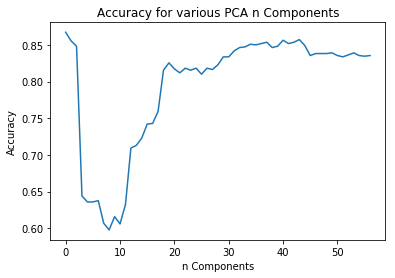

In [43]:
plt.plot(test_acc)
plt.xlabel('n Components')
plt.ylabel('Accuracy')
plt.title('Accuracy for various PCA n Components')